# C3 - Steps For Analysis
## Import Packages

In [1]:
# Enable inline plotting in the notebook. Comes before importing matplotlib
%matplotlib inline
# import packages
# Import pandas for data manipulation and working with dataframes
import pandas as pd
# Import numpy to perform numerical operations
import numpy as np
# Import matplotlib for creating plots and visualizations
import matplotlib.pyplot as plt
# Import seaborn for creating more advanced statistical visualizations
import seaborn as sns
# Import KMeans from sklearn.cluster to implement the K-means clustering algorithm
from sklearn.cluster import KMeans
# Import StandardScaler from sklearn.preprocessing to standardize the continuous variables
from sklearn.preprocessing import StandardScaler
# Import silhouette_score from sklearn.metrics to calculate the silhouette score for evaluating the quality of the clusters
from sklearn.metrics import silhouette_score
## Versions
# print(f"Dimensions{df.shape}")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")
import sklearn
print(f"sklearn version: {sklearn.__version__}")
import matplotlib
print(f"matplotlib version: {matplotlib.__version__}")


Pandas version: 2.0.0
Numpy version: 1.26.3
Seaborn version: 0.12.2
sklearn version: 1.3.0
matplotlib version: 3.7.1


## Load Data

In [2]:
# Import Data
df = pd.read_csv('c:/LabFiles/d212-data/medical/medical_clean.csv ', index_col=0) # path to csv; change for your environment
pd.set_option("display.max_columns", None) # to display all columns
# Examine first couple rows
df.head(5)       

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


## Drop unused columns

In [3]:
# Define the list of columns to be dropped
unused_columns = [
    'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
    'Lat', 'Lng', 'Area', 'TimeZone', 'Job', 'Children',
    'Marital', 'Gender', 'ReAdmis', 'Population', 'Age',
    'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink',
    'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
    'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
    'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
    'Services', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'
]
# Drop unused columns
df = df.drop(columns=unused_columns)

## Examine Data

In [4]:
print(f"Dimensions{df.shape}")
print(df.describe())
df.info()

Dimensions(10000, 5)
              Income   VitD_levels  Initial_days   TotalCharge   
count   10000.000000  10000.000000  10000.000000  10000.000000  \
mean    40490.495160     17.964262     34.455299   5312.172769   
std     28521.153293      2.017231     26.309341   2180.393838   
min       154.080000      9.806483      1.001981   1938.312067   
25%     19598.775000     16.626439      7.896215   3179.374015   
50%     33768.420000     17.951122     35.836244   5213.952000   
75%     54296.402500     19.347963     61.161020   7459.699750   
max    207249.100000     26.394449     71.981490   9180.728000   

       Additional_charges  
count        10000.000000  
mean         12934.528587  
std           6542.601544  
min           3125.703000  
25%           7986.487755  
50%          11573.977735  
75%          15626.490000  
max          30566.070000  
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 5 columns):
 #   Column              Non-

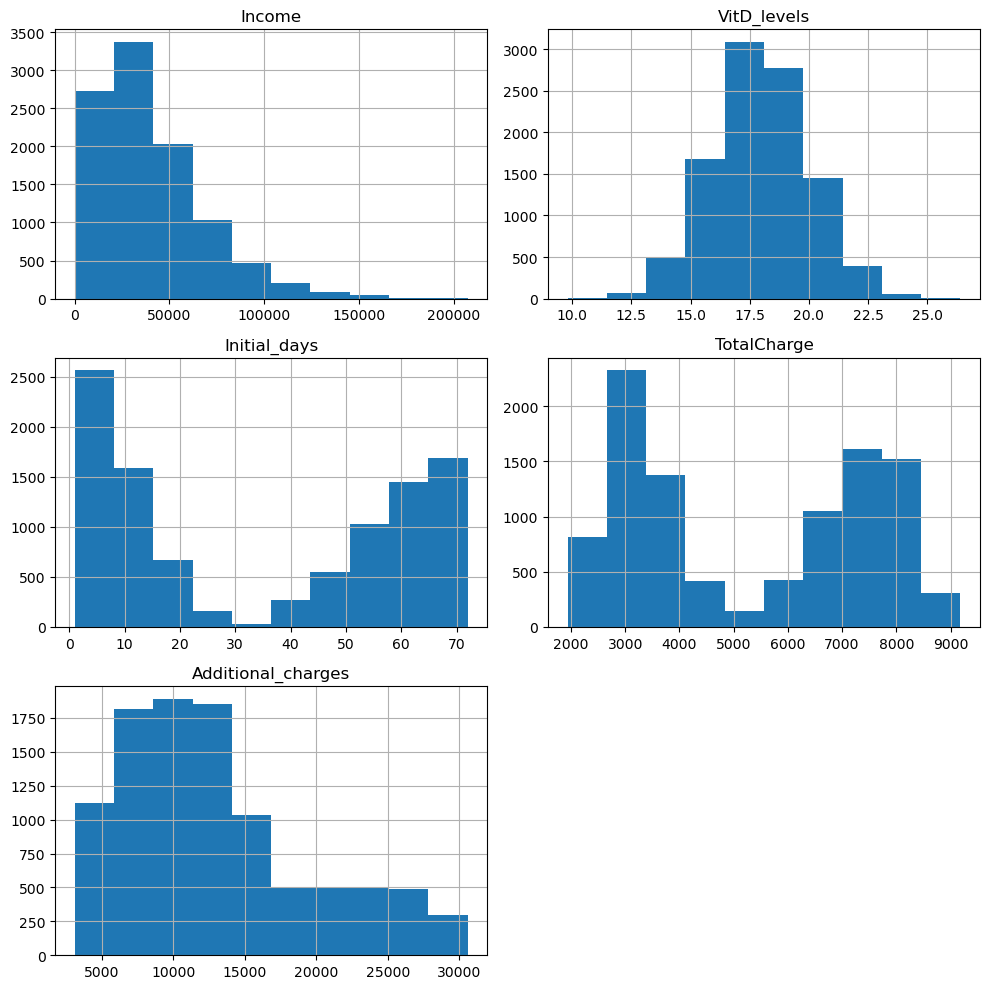

In [5]:
# Histograms
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

## Check for NULLS and Duplicates

In [6]:
# Evaluate the dataset for missing values and duplicate rows
print(df.isnull().sum())
print(df.duplicated().sum())

Income                0
VitD_levels           0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64
0


## Check for Outliers

Checking with Boxplots
Outliers for Income: 326
Outliers for VitD_levels: 60
Outliers for Initial_days: 0
Outliers for TotalCharge: 0
Outliers for Additional_charges: 424


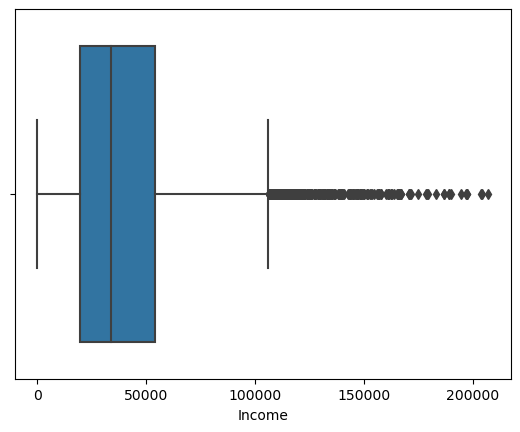

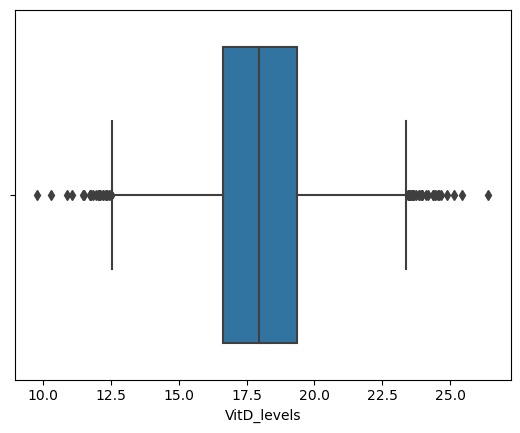

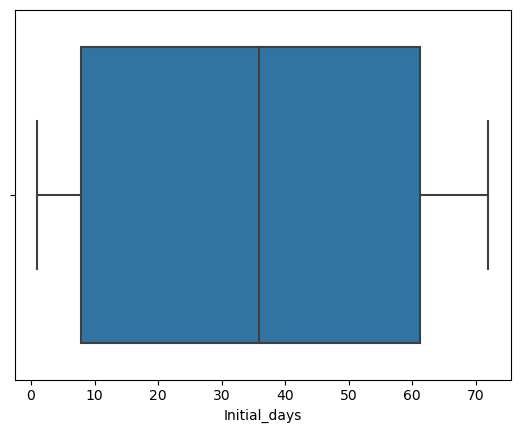

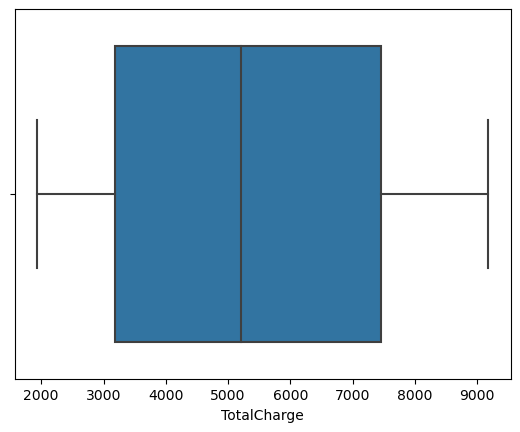

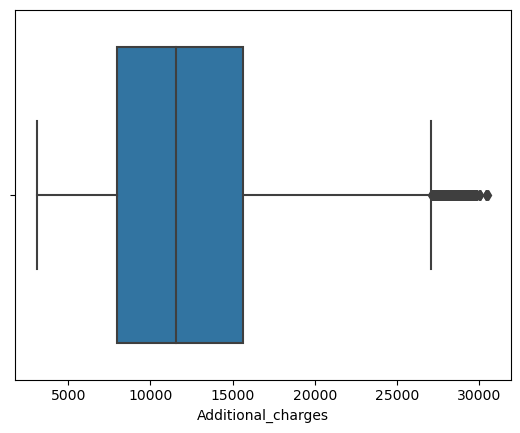

In [7]:
# Check with boxplots
# Boxplots
print('Checking with Boxplots')
# filter on only float64 datatype
int_float_cols = [col for col in df.columns if df[col].dtype in ('int64', 'float64')]

check_outliers = int_float_cols 

# # Create a figure for each column
for col in check_outliers:
    plt.figure()
    sns.boxplot(x=df[col], data=df)
    
    # Get the lower and upper whiskers for the column
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html
    q1 = df[col].quantile(q=0.25)
    q3 = df[col].quantile(q=0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    
    # Get the outliers for the column
    outliers = df[(df[col] < lower_whisker) | (df[col] > upper_whisker)][col]
    
    # Print the outliers for the column
    print(f"Outliers for {col}: {outliers.count()}")


## Check correlation

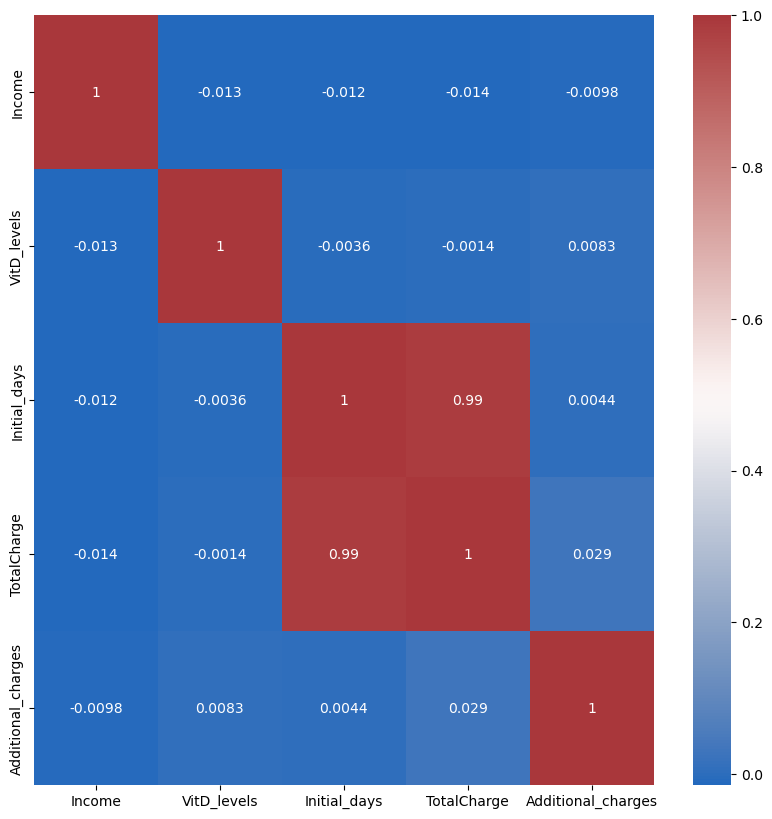

In [8]:
# Calculate correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 10))
# Visualize correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='vlag')
plt.show()

## Data Preprocessing/Transformation

In [9]:
scaler = StandardScaler()
df[['Initial_days', 'TotalCharge', 'Additional_charges', 'VitD_levels', 'Income']] = scaler.fit_transform(df[['Initial_days', 'TotalCharge', 'Additional_charges', 'VitD_levels', 'Income']])

# C4 - Cleaned Dataset
## to_excel
per the rubric the cleaned data should be submitted as an .xls or .xlsx file.

In [10]:
df.to_excel('c:/Users/pinlo/OneDrive/Desktop/WGU/d212-wgu/d212-submission/illovsky_d212_medical_prepared.xlsx')

# D - Analysis
## D1. Output and Internediate Calculations
### Elbow Method

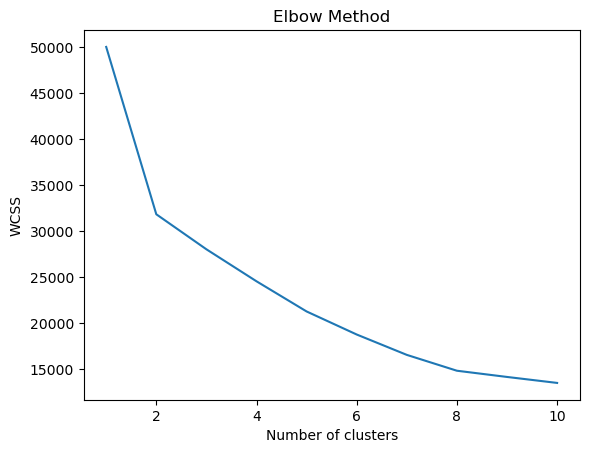

In [11]:
# Calculate WCSS for different number of clusters
# https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot WCSS against number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## D2 Code Execution

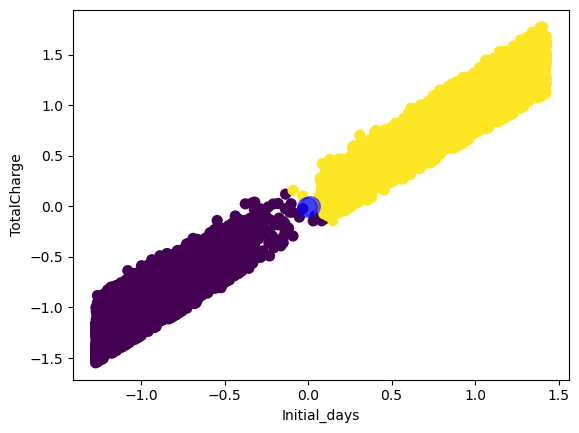

In [12]:
#initialize kmeans parameters
kmeans_kwargs = {
    "init": "random",
    "n_clusters": 2,
    "n_init": 10,
    "random_state": 1,
}

#create and fit kmeans model
kmeans = KMeans(**kmeans_kwargs)
kmeans.fit(df)

#get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

#visualize results
plt.scatter(df['Initial_days'], df['TotalCharge'], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=200, alpha=0.5)
plt.xlabel('Initial_days')
plt.ylabel('TotalCharge')
plt.show()

# E - Data Summary and Implications
## E1 - Quality of the Clustering Technique
### Silhouette Score

In [13]:
# get cluster labels from kmeans model
labels = kmeans.labels_
# calculate silhouette score for each data point
silhouette_scores = silhouette_score(df, labels)
# calculate mean silhouette score for all data points
mean_silhouette_score = np.mean(silhouette_scores)
# print mean silhouette score
print(f"Mean Silhouette Score: {mean_silhouette_score:.2f}")

Mean Silhouette Score: 0.36


## E2 - Results and Implications

In [14]:
# 'kmeans' is the KMeans model
df['cluster'] = kmeans.labels_

# Calculate the mean values for each cluster
cluster_means = df.groupby(['cluster']).mean()

# Convert the DataFrame to a more readable format
cluster_means = cluster_means.transpose()


In [15]:
print(cluster_means)

cluster                    0         1
Income              0.008639 -0.008646
VitD_levels         0.006503 -0.006508
Initial_days       -0.958450  0.959217
TotalCharge        -0.946704  0.947462
Additional_charges -0.005976  0.005981


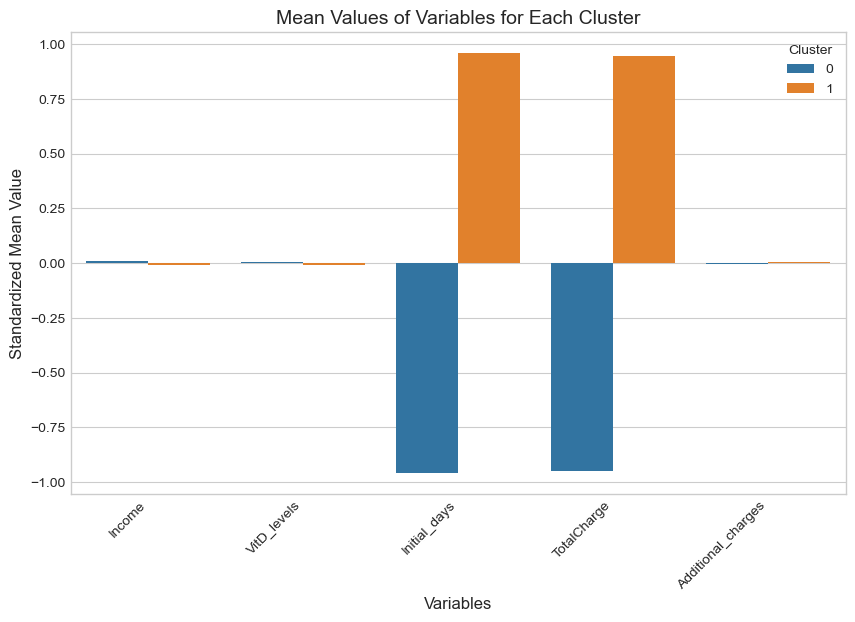

In [17]:
# Melt the DataFrame to make it suitable for seaborn
cluster_means_melted = cluster_means.reset_index().melt(id_vars='index', var_name='Cluster', value_name='Mean Value')

# Create the bar chart using seaborn
plt.figure(figsize=(10, 6)) 
sns.barplot(x='index', y='Mean Value', hue='Cluster', data=cluster_means_melted)

# Set chart title and labels
plt.title('Mean Values of Variables for Each Cluster', fontsize=14)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Standardized Mean Value', fontsize=12)

# Rotate x-axis labels (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show() 